In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

In [3]:
import random

In [4]:
tf.set_random_seed(777)

In [5]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [6]:
nb_classes = 10

In [7]:
X = tf.placeholder(tf.float32, shape=[None, 784])
Y = tf.placeholder(tf.float32, shape=[None, nb_classes])

In [8]:
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

In [9]:
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

In [10]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

In [11]:
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [12]:
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [13]:
num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

In [14]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Epoch: 0001, Cost: 0.284583701
Epoch: 0002, Cost: 0.283800260
Epoch: 0003, Cost: 0.283551762
Epoch: 0004, Cost: 0.282813132
Epoch: 0005, Cost: 0.282302498
Epoch: 0006, Cost: 0.281375867
Epoch: 0007, Cost: 0.280986337
Epoch: 0008, Cost: 0.280373696
Epoch: 0009, Cost: 0.280021005
Epoch: 0010, Cost: 0.279453919
Epoch: 0011, Cost: 0.278704539
Epoch: 0012, Cost: 0.278620413
Epoch: 0013, Cost: 0.277908979
Epoch: 0014, Cost: 0.277436180
Epoch: 0015, Cost: 0.277035053
Learning finished
Accuracy:  0.9191
Label:  [6]
Prediction:  [6]


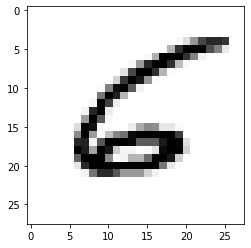

In [21]:
for epoch in range(num_epochs):
    avg_cost = 0
    
    for i in range(num_iterations):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
        avg_cost += cost_val / num_iterations
        
    print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

print("Learning finished")

print(
    "Accuracy: ",
    accuracy.eval(
        session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
    )
)

r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
print(
    "Prediction: ",
    sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]})
)

plt.imshow(
    mnist.test.images[r : r + 1].reshape(28, 28),
    cmap="Greys",
    interpolation="nearest"
)
plt.show()